# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [119]:
b0 = 0  # y intercept
b1 = -1 # slope for x1
b2 = 1 # slope for x2

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In this code we have decreased the number of samples from 1000 to 350 to analyze the results in comparison with the actual sample size of 1000 

In [120]:
sample_size = 350

In [121]:
x1_mean = 0
x1_stdev = 10
x1 = np.round(np.random.normal(x1_mean, x1_stdev, sample_size),2)

x2_mean = 0
x2_stdev = 10
x2 = np.round(np.random.normal(x2_mean, x2_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [122]:
y = b0 + b1*x1 + b2*x2

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all...

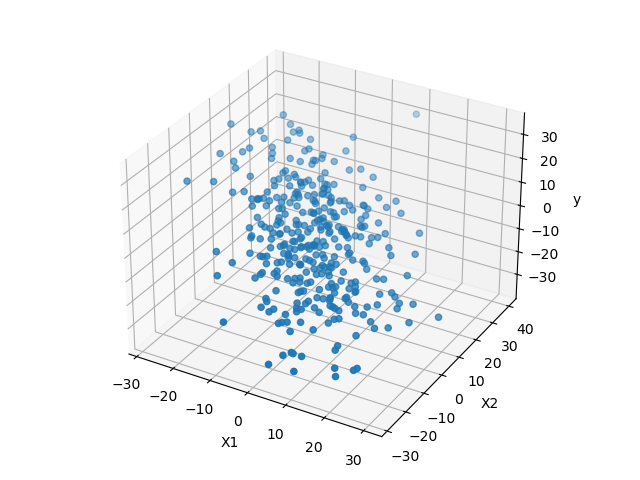

In [123]:
# this is a notebook 'MAGIC' that will allow for creation of interactive plot
%matplotlib widget 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

%matplotlib inline

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [124]:
e_mean = 0
e_stdev = 10
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

## Step 5: Explore the resulting synthesized data

Now, let's look at a scatter plot of both the X and y data with the noise added in...

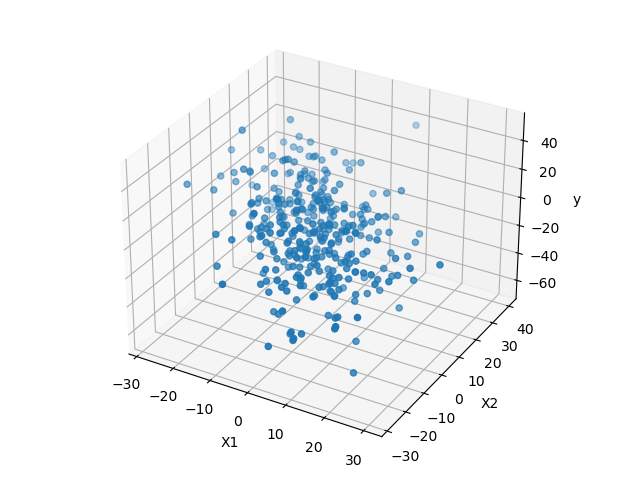

In [125]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

### Step 6: Create a pandas data frame from the data

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv. 

First we will create a dataframe with the data we just similated...

In [126]:
df = pd.DataFrame({'x1': x1, 'x2' : x2, 'target': y})
df

,x1,x2,target
0,16.24,10.10,-14.05
1,-6.12,9.20,27.56
2,-5.28,-1.95,2.74
3,-10.73,8.05,33.27
4,8.65,-7.01,-20.44
...,...,...,...
345,0.09,-1.32,-16.88
346,-1.68,10.19,17.74
347,-1.74,12.31,25.80
348,4.61,-11.81,-0.48


## Step 7: Save the data frame contents to a csv

Lastly, let's save the data we created to a csv file. This saved data will be used to practice finding hidden relationships in data.

In [127]:
df.to_csv('Sample_c02_dataset_2.csv', index=False)

Using the dataset created after decreasing the sample size, we will evaluate the outcomes.

## Step 1: Import the libraries we will use in this notebook

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

%matplotlib widget 

## Step 2: Load the given data that we will model

In [129]:
df = pd.read_csv('Sample_c02_dataset_2.csv')

df.head(3)

,x1,x2,target
0,16.24,10.10,-14.05
1,-6.12,9.20,27.56
2,-5.28,-1.95,2.74


Seperate out the input m(X) and the target (y)

In [130]:
X = df[['x1', 'x2']]
y = df[['target']]

For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

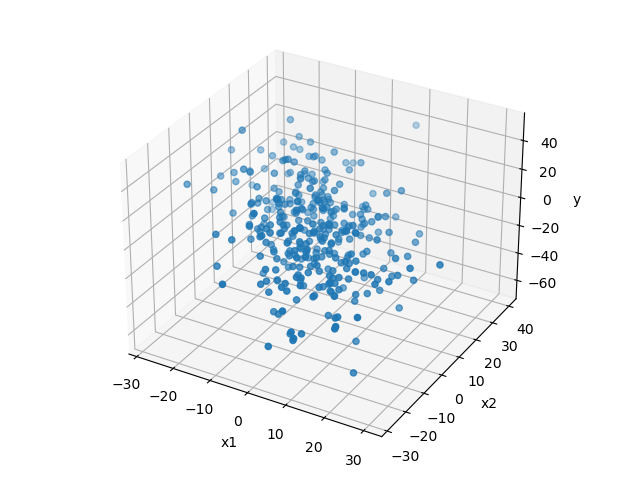

In [131]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['x1'], df['x2'], y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [132]:
lin_reg = LinearRegression().fit(X,y)

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

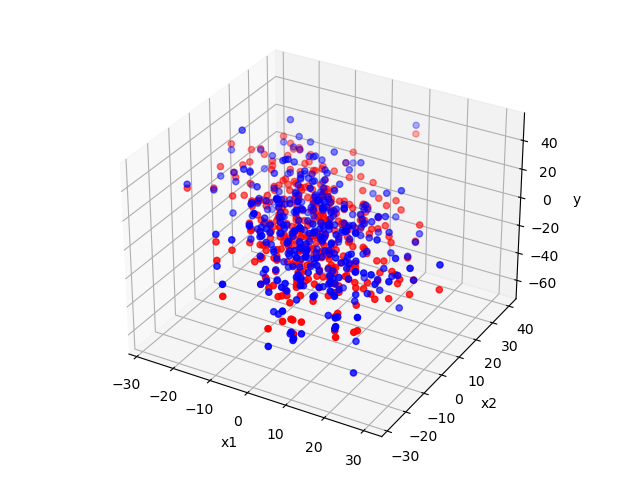

In [133]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X['x1'], X['x2'], y, color='blue')
ax.scatter(X['x1'], X['x2'], lin_reg.predict(X), color='red')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

... using fstring formatting, we can display these values as follows...

In [134]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
b2 = lin_reg.coef_[0][1]
r2 = lin_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x1 + {b2:.2f}x2")
print(f"R^2: {r2:.3f}")

Y = 0.10 + -1.07x1 + 1.04x2
R^2: 0.707


When we decrease the sample size we will have less data to perform regression which made it difficult to derive the relationship between dependent and independent variables and most importantly it will also lead to type 2 error which is false negative condition where even though there is improvement in the R squared value but in reality the outcome is false and this can lead to less accurate results.

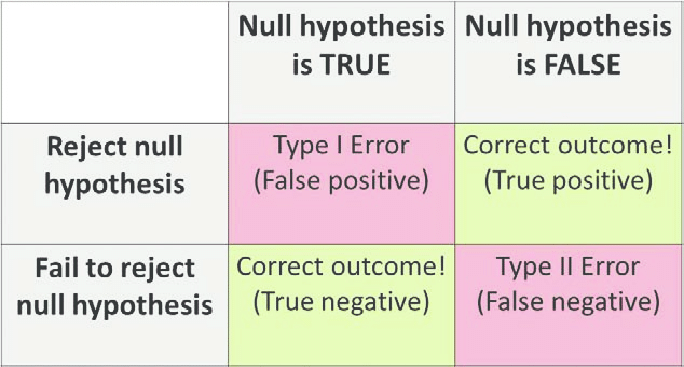